# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes, ou seja, quantidade de clientes iniciais menos quantidade de clientes finais, tudo dividido pelo total inicial. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/inaepmachado/Portfolio/master/imagens/churn.png" width="40%"></p>

Conhecer o Churn do seu negócio é fundamental para qualquer empresa, afinal você só consegue atuar naquilo que você conhece. A rotatividade de clientes, quando um cliente termina seu relacionamento com uma empresa, é um dos fatores mais básicos para determinar a receita de uma empresa. Você precisa saber quais de seus clientes são leais e quais estão em risco de abandono, e precisa conhecer os fatores que afetam essas decisões da perspectiva do cliente.

Porém, mais importante do que conhecer a taxa de churn, é poder identificar o perfil e o comportamento do cliente quando ele está prestes a sair e, com isso, fazer ações pré-churn para reter esse cliente.

Vários são os motivos que o cliente decide sair, traçar o perfil desses motivos para pode atuar irá impactar não somente na retenção dos clientes, mas também na conquista de novos, atuando nas duas pontas do ciclo de vida do cliente.

Neste [link](https://resultadosdigitais.com.br/blog/o-que-e-churn/) você irá encontrar toda explicação para entender não somente como churn influencia no negócio, mas qual a importância de atuar nessa fase do ciclo pode ajudar na conquista de um crescimento sustentável no mercado que atua.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e trata-se de um problema típico de uma companhia de telecomunicações. 


O *dataset* completo pode ser encontrado neste [GitHub](https://raw.githubusercontent.com/inaepmachado/DataSet/master/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves no site da IBM, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importar os pacotes necessários
import pandas                 as pd
import numpy                  as np
import matplotlib.pyplot      as plt
import seaborn                as sns
from imblearn.under_sampling  import RandomUnderSampler
from sklearn.metrics          import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics       import plot_confusion_matrix, plot_roc
from sklearn.preprocessing    import StandardScaler, LabelEncoder
from sklearn.pipeline         import make_pipeline
from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection  import GridSearchCV
from sklearn.svm              import SVC
from lightgbm                 import LGBMClassifier
from sklearn.linear_model     import SGDClassifier
from sklearn.tree             import DecisionTreeClassifier
from sklearn.linear_model     import LogisticRegression
from xgboost                  import XGBClassifier
from sklearn.ensemble         import RandomForestClassifier

# random seed para garantir replicabilidade dos resultados
np.random.seed(42)

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/inaepmachado/DataSet/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A visualização das 5 primeiras entradas já permite entender como o dataset está composto e as possibilidades de análise através das variáveis.

In [3]:
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Linhas:		7043
Colunas:	21


Como se verifica acima, o dataset é composto de 7043 entradas e 21 variáveis.

## Análise Exploratória dos Dados

Para começar o entendimento dos dados, vamos seguir a receita passada anteriormente e analisar: os nomes das colunas, os tipos de variáveis or coluna, os valores únicos por coluna e a quantidade de dados ausentes.

In [4]:
print("1) Nomes das variáveis\n{}\n".format(df.columns.values))
print("2) Tipos de Variáveis\n{}\n".format(df.dtypes))
print("3) Valores únicos (por coluna):\n{}\n".format(df.nunique()))

1) Nomes das variáveis
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

2) Tipos de Variáveis
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

3) Valores únicos (por coluna):
customerID 

In [5]:
print("Dados ausentes (total):\t{}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])

Dados ausentes (total):	0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


Veja algumas observações que merecem destaque, observadas nessa fase inicial:

* A coluna `costumerID` não agrega nenhuma informação, pois se trata de um identificador única para cada cliente. Ela pode e deve ser utilizada para quantificar os clientes, tendo somente esta função neste caso específico. Em estudos realizados dentro da própria empresa, é possível usar essa variável como o identificador do cliente, e efetuar cruzamentos com outras bases, para se obter outras informações, por exempplo;
* A variável target `Churn` está como categórica string `No` e `Yes`, havendo a necessidade de alteração para 0 e 1;
* A coluna `TotalCharges` deveria ser um `float`, mas está como `string`;
* Apesar de não termos detectado nenhum valor ausente, existem algumas strings que representam sim valores ausentes. Isso porque o banco está configurado com muitas variáveis do tipo `string`, não mostrando a ausência dos valores nestas variáveis. É preciso ficar atento a isso antes de qualquer início de modelagem, preparar o banco de dados é fundamental para o processo;
* Várias features precisam ser codificadas para valores numéricos.
    * Há várias features binárias, incluindo nossa variável alvo, ou com múltiplos valores, cada um representando uma categoria.

Retornando à situação de dados ausentes na coluna `TotalCharges`, veja como foi possível identificar (explicado no vídeo da aula).


In [6]:
# EXEMPLO DE DADOS QUE PRECISAM SER TRABALHADOS

# converter coluna TotalCharges para float
df["TotalCharges"].astype('float32')

ValueError: ignored

Quando tentamos converter as strings da coluna `TotalCharges`, acabamos identificando um erro.

O que aconteceu na verdade, foi que os supostos dados ausentes foram lançados como a string `""`. Quando tentamos `float("")`, o interpretador retorna um erro.

Assim, para conseguir converter adequadamente, criei uma função para lidar com essa exceção.

In [7]:
def converter_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: variável string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """
    try:
        return float(entrada)
    except ValueError:
        return np.nan

# criar cópia do dataframe
df_clean = df.copy()

# remover coluna costumerID
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges para float
df_clean["TotalCharges"] = df_clean["TotalCharges"].apply(converter_str_float)

# verificar entradas ausentes
print("Dados ausentes em 'TotalCharges' (antes): {}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em 'TotalCharges' (antes): 11



Agora com a variável ajustada, dados ausentes foram encontrados, e substitui pelo valor da mediana da coluna.

In [8]:
# confere distribuição das variáveis numéricas
df_clean.describe() 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Apesar deste dataset ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver que não há indícios da presença de outliers.

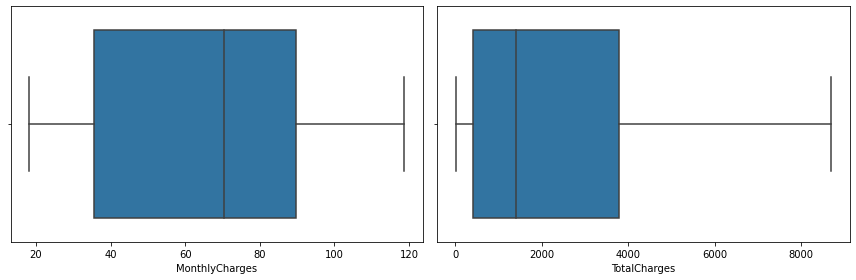

In [9]:
# boxplot das variáveis `float`
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()

Analisando o boxplot para as colunas `MonthlyCharges` e `TotalCharges`, perceba como a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.

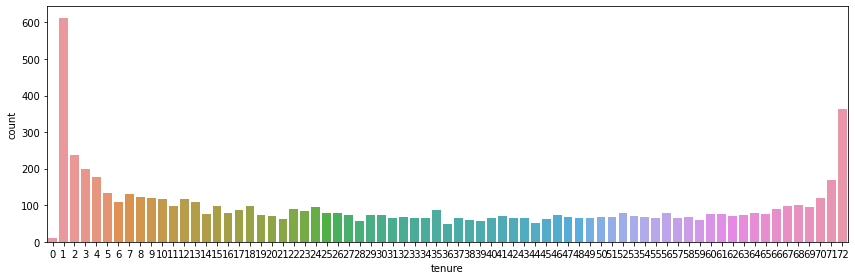

In [10]:
# distribuição do tempo de assinatura
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(df['tenure'])
plt.tight_layout()

A variável `tenure` está relacionada ao tempo que um cliente permanece assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade.

Lidando com variáveis categóricas, é importante ver os valores únicos, ou seja, quais categorias estão compondo o banco de dados. Isso permite identificar situações como labels diferentes querendo indicar a mesma coisa.

Vendo os valores impressos na célula abaixo, entendo que um cientista de dados pode querer considerar valores como `No`, `No phone service` e `No internet service` como sendo a mesma coisa.

Apesar de totalmente válida, não será essa a premissa adotada aqui. Irei considerar cada label individualmente.

In [11]:
# verificar valores únicos das variáveis categóricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

Para identificar se os nossos dados podem estar com algum tipo de bias (viés), irei verificar a contagem de valores para `Male` e `Female`.

Apesar de não entender que isso poderia gerar algum prejuízo relevante neste problema específico, haverá muitas situações onde esse prejuízo será real, como é o caso de modelos aplicados à contratação de funcionários ou previsão de crimes.

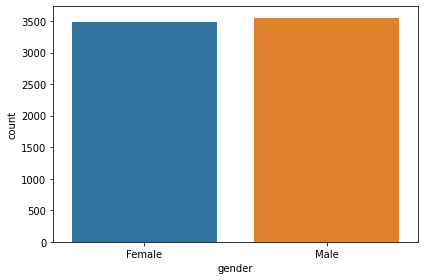

In [12]:
sns.countplot(df.gender)
plt.tight_layout()

Você pode ver que o gênero está balanceado, ou seja, no que se refere a gênero temos uma distribuição igual entre `Male`e `Female`.

Por fim, nesta primeira análise exploratória, vamos ver o balanceamento das classes do dataset.

Classe 'No' do dataset: 5174

Classe 'Yes' do dataset: 1869

% 'Yes' do dataset: 26.54%



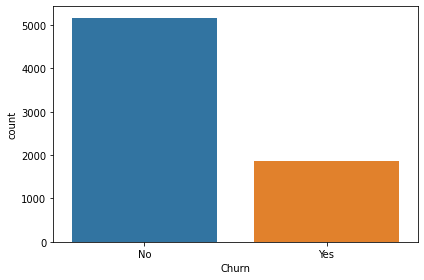

In [13]:
sns.countplot(df.Churn)
plt.tight_layout()

print("Classe 'No' do dataset: {:.0f}\n".format((df[df.Churn == 'No'].shape[0])));
print("Classe 'Yes' do dataset: {:.0f}\n".format((df[df.Churn == 'Yes'].shape[0])));
print("% 'Yes' do dataset: {:.2f}%\n".format((df[df.Churn == 'Yes'].shape[0]/df.shape[0])*100));

É possível identificar na variável target que a classe `No` ocorre com frequência muito superior à classe `Yes` - 26,5%. Isso será considerado na etapa de construção do modelo de machine learning.

## Preparar os Dados

Nesta etapa de preparação dos dados, será realizado um pré-processamento básico, apenas com a finalidade de construir um modelo base. 

As features que tem dois labels serão processadas usando o `LabelEncoder`, incluindo a variável target `Churn`. As categóricas com mais de dois labels serão transformadas em variáveis dummy para cada label e, assim,  permitir a sua utilização em todos os modelos.

In [14]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# pré processar as variáveis

# identifica as variáveis binárias
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
print('binárias:           ',binary_var)

# identifica as variáveis inteiras excluindo as binárias
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
print('discretas/contínuas:', num_var)

# identifica as variáveis categóricas excluindo as binárias e inteiras - isso para garantir que não irá classificá-las como categorias
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]
print('categóricas:        ', cat_var)

# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias: gender Female = 0 e Male = 1; Partner Yes = 1 e No = 0, e assim por diante
le = LabelEncoder()
for i in binary_var:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes, transformando uma a uma em dummies: cada categoria de cada variável irá se tornar 1 ou 0
df_proc = pd.get_dummies(df_proc, columns=cat_var)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

binárias:            ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
discretas/contínuas: ['tenure', 'MonthlyCharges', 'TotalCharges']
categóricas:         ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

Para podermos comparar o desempenho e melhora do modelo, criaremos um baseline simples. Não será feito nenhum ajuste nos hiperparâmetros e nem será pensado ainda em balanceamento de dados, feature engineering ou feature selection (links com explicação de cada um estará ao final desse projeto).

No entanto, desde já é importante separar os dados que serão utilizados como treino e como teste. Lembrando que os dados de teste só irão ser utilizados na última etapa do projeto, para termos uma avaliação mais real.

In [16]:
# separar a feature matrix da target vector: separar a variável target Churn das demais da base df_proc criada anteriormente
X = df_proc.drop('Churn', axis=1)
y = df_proc['Churn']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

Irei usar a cross-validation para estimar o erro da baseline e dos modelos iniciais, para poder comparar com os modelos posteriores e identificar o melhor. Para facilitar e melhorar o código, foi criada uma função `val_model`. A métrica utilizada para avaliação será `recall`.

In [17]:
# Criando a função que irá chamar o cross-validation: clf é o modelo que será usado

def val_model(X, y, clf, quite=True ): #imprimir ou não mais informações
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independentes.
        y: Series, vetor contendo a variável alvo, variável target.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    # Pipeline é para padronizar os dados quando for fazer o cross-validation
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    # retorna a média do escore: scores.mean()
    if quite == True:
        print("Recall: {:.8f} (+/- {:.3f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Para o baseline inicial, usarei o Random Forest, sem nenhum tipo de alteração nos parâmetros. Os dados que serão passados são os de treino.

In [18]:
# criar baseline e ver desempenho: o baseline será feito com o modelo Random Forest
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.47194245 (+/- 0.023)


Uma vez que temos um baseline para comparar se os ajustes melhoram ou pioram o desempenho do modelo, irei realizar o balanceamento dos dados e ver como isso irá impactar.

A técnica escolhida foi Under Sampling, após alguns teste de desempenho das outras. Seguindo recomendações de algumas literaturas, os dados serão padronizados antes de usar essa técnica de balanceamento.

Como temos um número grande de registros podemos usar o Under Sampling, mas se tivéssemos 50 registros, por exemplo, precisaria ser o Over Sampling.

Lembrando, é importante que o balanceamento aconteca apenas com os dados de treino. Os dados de teste devem permanecer intocáveis.

In [19]:
#  padronizar os  dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM



In [20]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# função que irá aplicar em cada um dos modelos e avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

Recall: 0.76978417 (+/- 0.019)
Recall: 0.68129496 (+/- 0.024)
Recall: 0.73381295 (+/- 0.045)
Recall: 0.79064748 (+/- 0.038)
Recall: 0.80719424 (+/- 0.033)
Recall: 0.80503597 (+/- 0.025)
Recall: 0.76618705 (+/- 0.024)


,Recall
RandomForestClassifier,0.769784
DecisionTreeClassifier,0.681295
SGDClassifier,0.733813
SVC,0.790647
LogisticRegression,0.807194
XGBClassifier,0.805036
LGBMClassifier,0.766187


Dadas as características do problema e o desempenho durante as execuções anteriores, optei pelo XGBoost, praticamente empatado com a Regressão Logística.

Meu entendimento é que o tuning dos parâmetros pode melhorar ainda mais a qualidade da solução. Como temos poucos ajustes possíveis na Regressão Logística, não acredito que o resultado poderia passar o XGBoost.

Em função disso, iremos otimizar os Hiperparâmetros para o XGBoost.


## Otimização dos Hiperparâmetros

XGBoost possui inúmeros parâmetros e a otimização deles tem como objetivo identificar o melhor que determine quantas árvores (aprendizes fracos ou estimadores) configurar em seu modelo de aumento de gradiente e quão grande cada árvore deve ser. Na recomendação de leitura tem um artigo bem interessante, onde conseguiremos aprender como selecionar o número e o tamanho das árvores de decisão a serem usadas em seu problema.

Dentre esses parâmetros, alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Abaixo, irei ajustar o número de estimadores. O modelo foi instanciado com a `learning_rate=0.1` (taxa de aprendizado).

Para o range dos estimadores, colocamos como parâmetros ir do `0` ao `1000` indo de `50` em `50`. E podemos ir diminuindo esse step, pedindo para ele ir com mais ou menos precisão. Alterei depois o step para `25` e teve um melhor desempenho, então o mantive.

In [21]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {                    
 'n_estimators':range(0,1000,50), # (start 0, stop 1000, step 50)
}

# identificar o melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8107913669064748 para {'n_estimators': 50}


Com o número de estimadores igual a `50`, realizarei a busca pelos parâmetros `max_depth` e `min_child_weight`. Ao buscar o `max_depth` irei buscar pela profundidade da árvore máxima ideal, com a menor perda possível de `log`.

In [22]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8237410071942446 para {'max_depth': 1, 'min_child_weight': 1}


Obtidos os valores de `max_depth = 1` e `min_child_weight = 1`, irei otimizar o parâmetro `gamma`.

In [24]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.823021582733813 para {'gamma': 0.0}


Até agora estávamos trabalhand com um `learning_rate = 0.1`. Agora, com um obtido final de `gamma = 0`, vou testar quatro valores para a `learning_rate` e ver qual oferece o melhor resultado. Lembrando que os demais parâmetros obtidos anteriormente devem ser mantidos.

In [25]:
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8812949640287769 para {'learning_rate': 0.001}


Uma taxa de aprendizado menor conseguiu melhorar o desempenho do modelo XGBoost, considerando `recall` como sendo a única métrica de importância (premissa assumida no início desse projeto).

Resumindo, ficamos com o modelo com os seguintes parâmetros:

`learning_rate = 0.001`
`n_estimators = 50`
`max_depth = 1`
`min_child_weight = 1`
`gamma = 0.0`


Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

In [26]:
# modelo final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.001, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Após o ajuste do modelo completo nos dados de treino, iremos testar esse modelo nos dados de teste e verificar se a performance está sendo mantida ou não.

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1282
           1       0.44      0.90      0.59       479

    accuracy                           0.66      1761
   macro avg       0.69      0.73      0.65      1761
weighted avg       0.80      0.66      0.68      1761

AUC: 0.7336



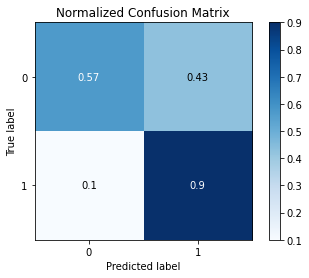

In [27]:
# fazer a previsão nos dados de teste para ver se o modelo ajustado mantem a performance que tinha nos dados de treino
X_test = scaler.transform(X_test) # padronização dos dados de teste
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

No modelo final aplicado ao banco de dados de teste, chegamos na nossa métrica inicial `Recall = 0.9`, chegamos em um modelo que identifica como sendo `1` 90% dos casos que realmente foram `1`. Ou seja, o modelo vai classificar como `Churn = 1` corretamente 90% dos casos que de fato deram churn. 

## Conclusões

No último modelo ajustado com os dados de treino chegamos em um recall de 88%, e para os dados de teste chegamos em um recall de 90%. Os dados de testes não haviam sido passados para o modelo ainda. No entanto, ele manteve um desempenho próximo àquele estimado anteriormente, graças a um bom trabalho de otimização nos parâmetros. 

Ainda há espaço para se tentar outras técnicas de balanceamento de dados e também técnicas de machine learning como feature engineering e feature selection.

## Recomendações
Como recomendações de estudo, seguem dois links que explicam como o XGBoost funciona: [Visão geral XGBoost](https://datarisk.io/gradient-boostings-parte-2-xgboost/?cn-reloaded=1) e 
[Como fazer o Tunning do XGBoost com escolha de hiperparâmetros](https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/).

Também estou passando um link de [Feature Engineering](https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a), para entendermos da necessidade de aprofundar no conhecimento do assunto que está modelando e, por consequência, melhorar os inputs e variáveis que podem ser usadas para a criação do modelo, não se restringindo somente ao banco de dados em questão.

No projeto fizemos padronização dos dados e [neste link](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf) tem um resumo de quando se escolher entre padronizar ou normalizar, além da importância disso, que também pode ser encontrada em maiores detalhes [aqui](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

Por fim, quem quiser aprender um pouco sobre [Cross Validation](https://towardsdatascience.com/cross-validation-430d9a5fee22), com uma visão mais prática, ou neste outro [link](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection), uma visão mais técnica.

Estes links estão relacionados a cada passo que demos nesse projeto, um aprofundamento necessário de estudo que fiz e recomendo para o desenvolvimento de DS.

## Dúvidas, reclamações, sugestões etc

Estou iniciando esse projeto onde todo estudo que fizer irei compartilhar por aqui e gostaria muito de sugestões, reclamações, dúvidas etc.

Por favor, entre em contato direto comigo, abaixo deixo meus contatos para toda troca de informação.

- [Linkedin](www.linkedin.com/in/inaepmachado)

- [Email](inae.pmachado@gmail.com)

- [Github](https://github.com/inaepmachado)

Vlw!
